In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


###Load the Data and Train the Model

In [4]:
# Load dataset
file_path = (r"D:\Assignment\Machine Lerning\machine-learning-introduction-Sabuna-Gamal\Data\BostonHousing.csv")
df = pd.read_csv(file_path)

# Check for missing values
print("Missing values before handling:\n", df.isnull().sum())

# Drop rows with NaN values (only if few values are missing)
df = df.dropna()

# Define features and target variable
X = df.drop(columns=['medv'])  # Features
y = df['medv']  # Target variable

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


Missing values before handling:
 crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


LinearRegression()

###Evaluate the model

In [5]:
# Predict on test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")


Mean Squared Error (MSE): 20.69
R-squared (R²): 0.72


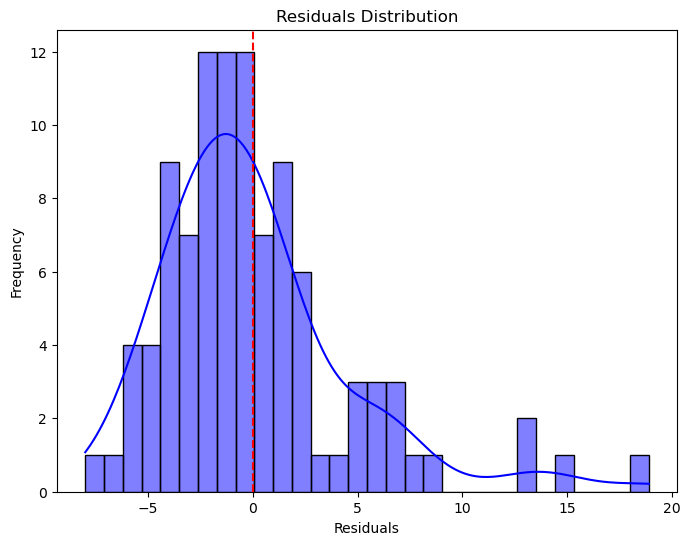

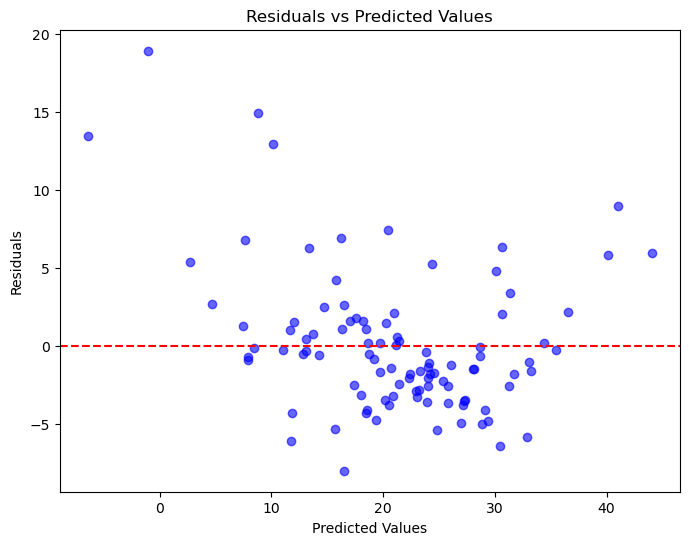

In [6]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30, color="blue")
plt.axvline(0, color="red", linestyle="--")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residuals Distribution")
plt.show()

# Residuals vs Predictions plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color="blue", alpha=0.6)
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()


 ###Compare Performance with Different Feature Sets

In [8]:
# Try with fewer features
selected_features = ['rm', 'lstat', 'ptratio']  # Select important features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Train new model
model_selected = LinearRegression()
model_selected.fit(X_train_selected, y_train)

# Predict and evaluate
y_pred_selected = model_selected.predict(X_test_selected)
mse_selected = mean_squared_error(y_test, y_pred_selected)
r2_selected = r2_score(y_test, y_pred_selected)

print(f"Selected Features - MSE: {mse_selected:.2f}, R²: {r2_selected:.2f}")


Selected Features - MSE: 24.60, R²: 0.67
